# K mean dataset

## Forming k Mean clustering after dimensionality reduction

In [1]:
import pandas as pd

# Load the dataset from the CSV file
file_path = r"C:\Users\roari\Downloads\customer_kmean_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [2]:
data.shape

(1000, 8)

In [3]:
data.size

8000

In [4]:
print("\nInformation about the dataset:")
data.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [5]:
print("\nDescriptive statistics:")
data.describe(include='all')


Descriptive statistics:


,name,age,gender,education,income,country,purchase_frequency,spending
count,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000.000000
unique,991,NaN,2,4,NaN,239,NaN,NaN
top,Michael Brown,NaN,Male,Bachelor,NaN,Congo,NaN,NaN
freq,3,NaN,501,271,NaN,12,NaN,NaN
mean,NaN,41.754000,NaN,NaN,59277.852000,NaN,0.554600,9613.296835
std,NaN,13.778582,NaN,NaN,23258.377128,NaN,0.284675,5484.707210
min,NaN,18.000000,NaN,NaN,20031.000000,NaN,0.100000,611.985000
25%,NaN,30.000000,NaN,NaN,38825.500000,NaN,0.300000,5020.425000
50%,NaN,42.000000,NaN,NaN,58972.000000,NaN,0.600000,9430.395000
75%,NaN,54.000000,NaN,NaN,79114.000000,NaN,0.800000,13645.507500


In [6]:
print("\nCount of null values in each column:")
data.isnull().sum()


Count of null values in each column:


name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

In [7]:
# Get the columns names and their corresponding data types
column_data_types = data.dtypes

# Display column names and data types
print("Column names and their data types:")
column_data_types

Column names and their data types:


name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

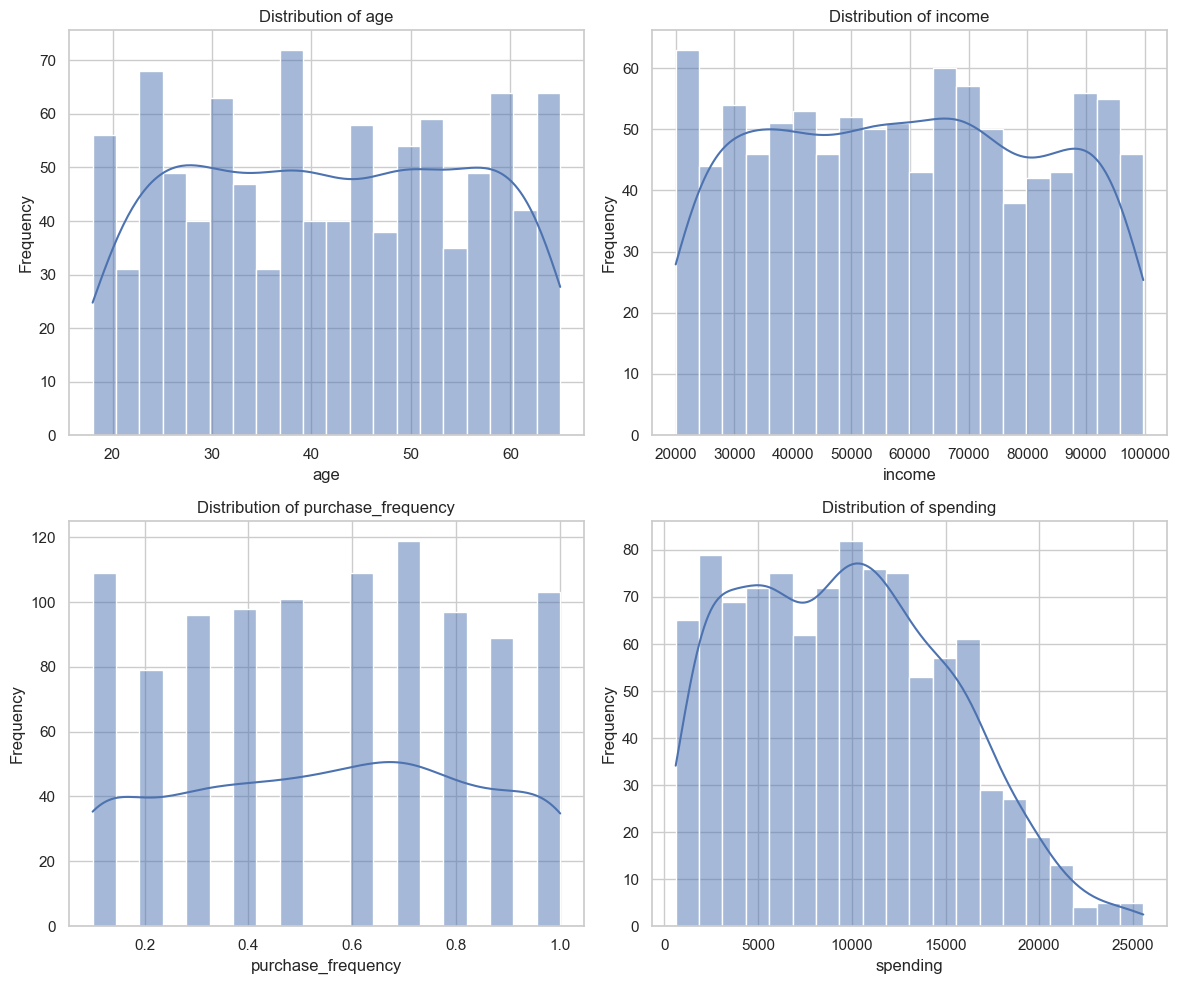

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a list of numerical columns
numerical_columns = ['age', 'income', 'purchase_frequency', 'spending']

# Create histograms for each numerical column
plt.figure(figsize=(12, 10))  # Set the figure size

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.histplot(data[column], bins=20, kde=True)  # kde=True adds a Kernel Density Estimate line
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

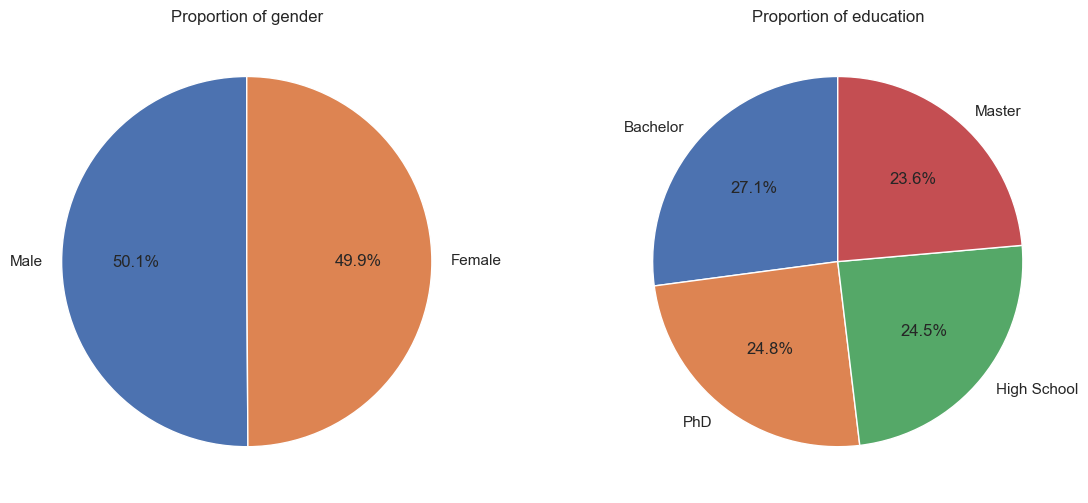

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a list of categorical columns
categorical_columns = ['gender', 'education']

# Create pie charts for each categorical column
plt.figure(figsize=(12, 10))  # Set the figure size

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    data_counts = data[column].value_counts()  # Count occurrences of each category
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of {column}')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [10]:
# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=['gender', 'education', 'country'], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,name,age,income,purchase_frequency,spending,gender_Male,education_High School,education_Master,education_PhD,country_Albania,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,Teresa Williams MD,42,53936,0.9,13227.120,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Christine Myers,49,82468,0.6,12674.040,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Dwayne Moreno,55,56941,0.3,5354.115,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Amy Norton,24,60651,0.2,2606.510,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Tonya Adams,64,81884,0.9,18984.780,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [11]:
# Convert only the boolean columns (those that are the result of one-hot encoding) to integers
boolean_cols = data_encoded.select_dtypes(include='bool').columns  # Get boolean columns
data_encoded[boolean_cols] = data_encoded[boolean_cols].astype(int)  # Convert to integers

# Display the first few rows of the modified DataFrame
data_encoded.head()

,name,age,income,purchase_frequency,spending,gender_Male,education_High School,education_Master,education_PhD,country_Albania,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,Teresa Williams MD,42,53936,0.9,13227.120,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Christine Myers,49,82468,0.6,12674.040,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dwayne Moreno,55,56941,0.3,5354.115,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amy Norton,24,60651,0.2,2606.510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tonya Adams,64,81884,0.9,18984.780,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to scale (excluding the non-numerical columns like 'name')
numerical_cols = ['age', 'income', 'purchase_frequency', 'spending']  # List of numerical columns

# Fit and transform the data
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the first few rows of the scaled DataFrame
data_encoded.head()

,name,age,income,purchase_frequency,spending,gender_Male,education_High School,education_Master,education_PhD,country_Albania,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,Teresa Williams MD,0.510638,0.425146,0.888889,0.505931,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Christine Myers,0.659574,0.782919,0.555556,0.483749,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dwayne Moreno,0.787234,0.462827,0.222222,0.190183,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amy Norton,0.127660,0.509348,0.111111,0.079991,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tonya Adams,0.978723,0.775596,0.888889,0.736842,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


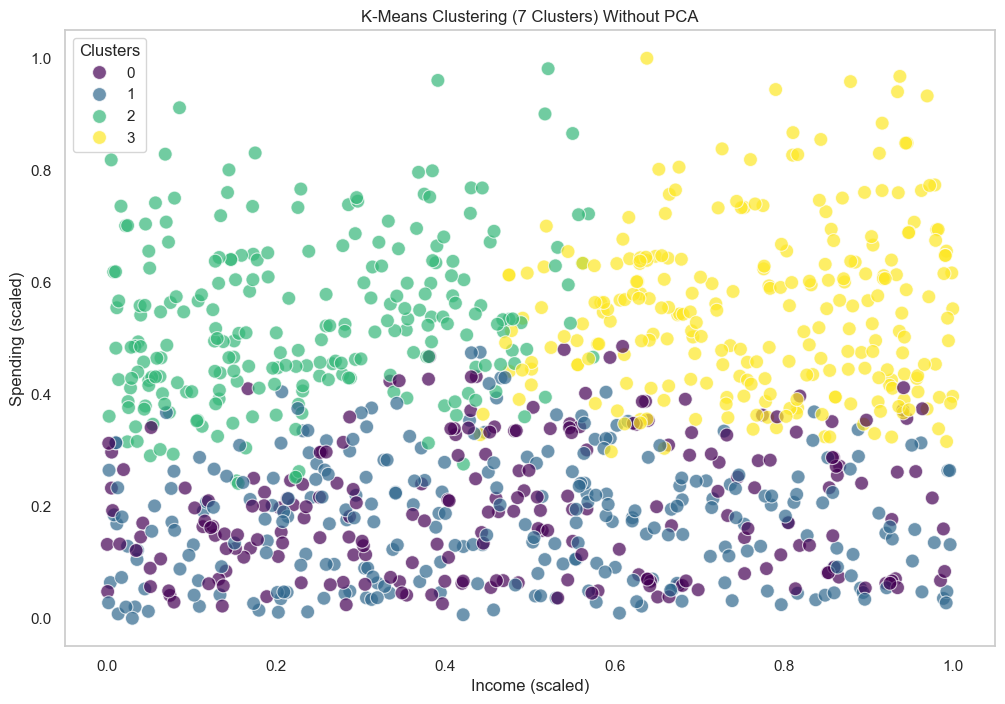

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Assuming data_encoded is already available
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'income', 'purchase_frequency', 'spending']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# K-Means Clustering
n_clusters = 4  # Optimal number of clusters based on Silhouette Score
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded[numerical_cols])

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_encoded, x='income', y='spending', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering (7 Clusters) Without PCA')
plt.xlabel('Income (scaled)')
plt.ylabel('Spending (scaled)')
plt.legend(title='Clusters')
plt.grid()
plt.show()


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


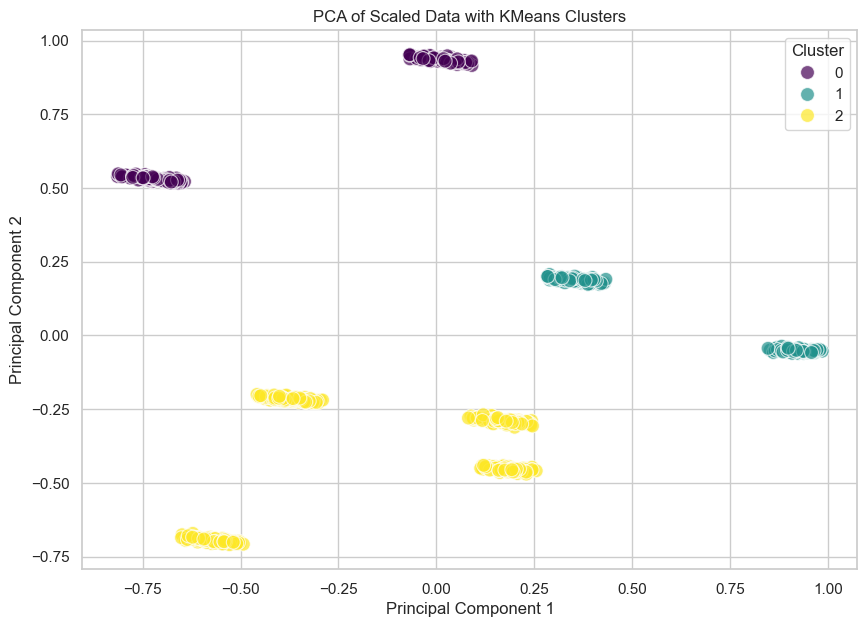

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load your dataset (replace with your actual data loading method)
# data_encoded = pd.read_csv('your_data_file.csv') # Example of loading a dataset

# Assuming data_encoded is already available
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'income', 'purchase_frequency', 'spending']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_encoded.drop(columns=['name']))  # Drop the 'name' column

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Perform KMeans clustering (choose the number of clusters, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('PCA of Scaled Data with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

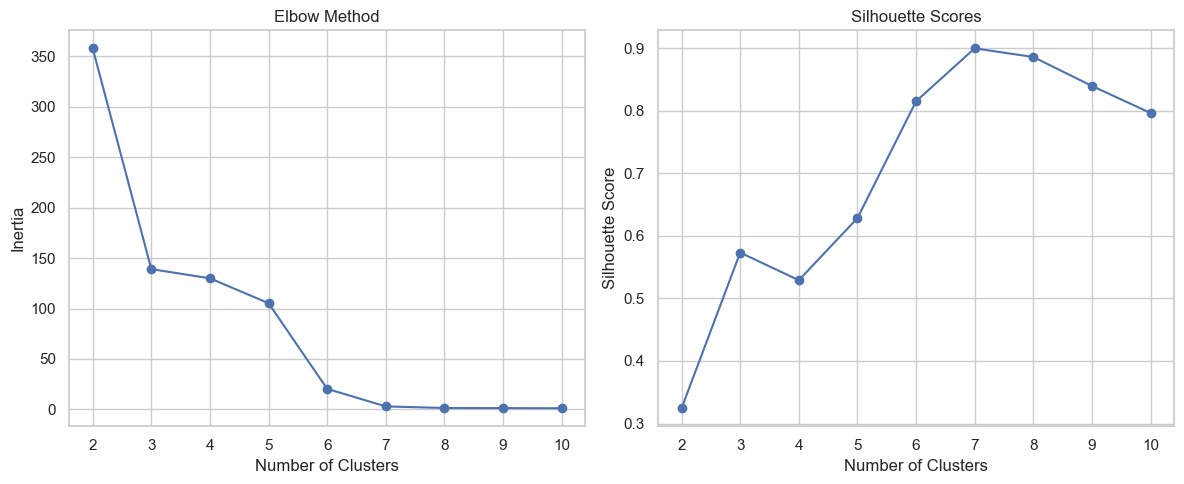

Optimal number of clusters according to Elbow Method: 10
Optimal number of clusters according to Silhouette Score: 7


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your dataset (replace with your actual data loading method)
# data_encoded = pd.read_csv('your_data_file.csv') # Example of loading a dataset

# Assuming data_encoded is already available
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'income', 'purchase_frequency', 'spending']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_encoded.drop(columns=['name']))  # Drop the 'name' column

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Test with clusters from 2 to 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)

plt.tight_layout()
plt.show()

# Determine the optimal number of clusters
optimal_clusters_elbow = cluster_range[inertia.index(min(inertia))]
optimal_clusters_silhouette = cluster_range[silhouette_scores.index(max(silhouette_scores))]

print(f"Optimal number of clusters according to Elbow Method: {optimal_clusters_elbow}")
print(f"Optimal number of clusters according to Silhouette Score: {optimal_clusters_silhouette}")


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


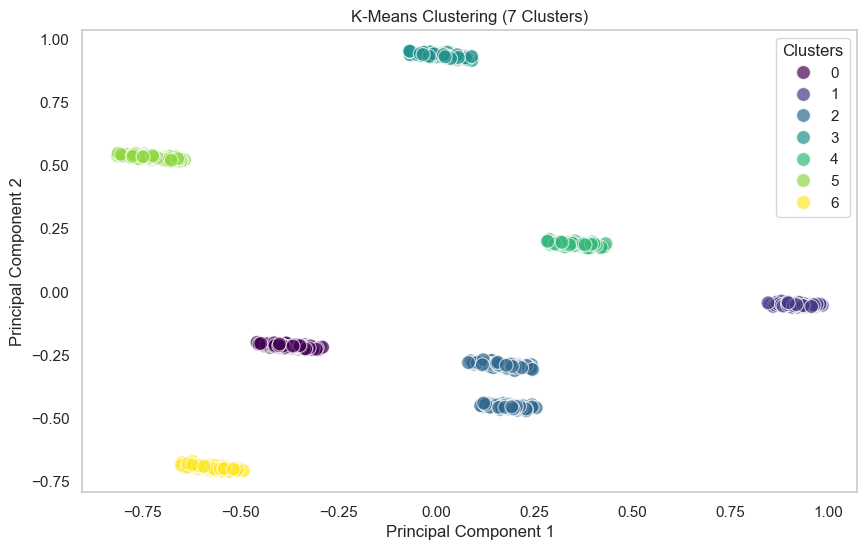

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load your dataset (replace with your actual data loading method)
# data_encoded = pd.read_csv('your_data_file.csv')  # Example of loading a dataset

# Assuming data_encoded is already available
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'income', 'purchase_frequency', 'spending']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_encoded.drop(columns=['name']))  # Drop the 'name' column

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# K-Means Clustering
n_clusters = 7  # Optimal number of clusters based on Silhouette Score
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering (7 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid()
plt.show()


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


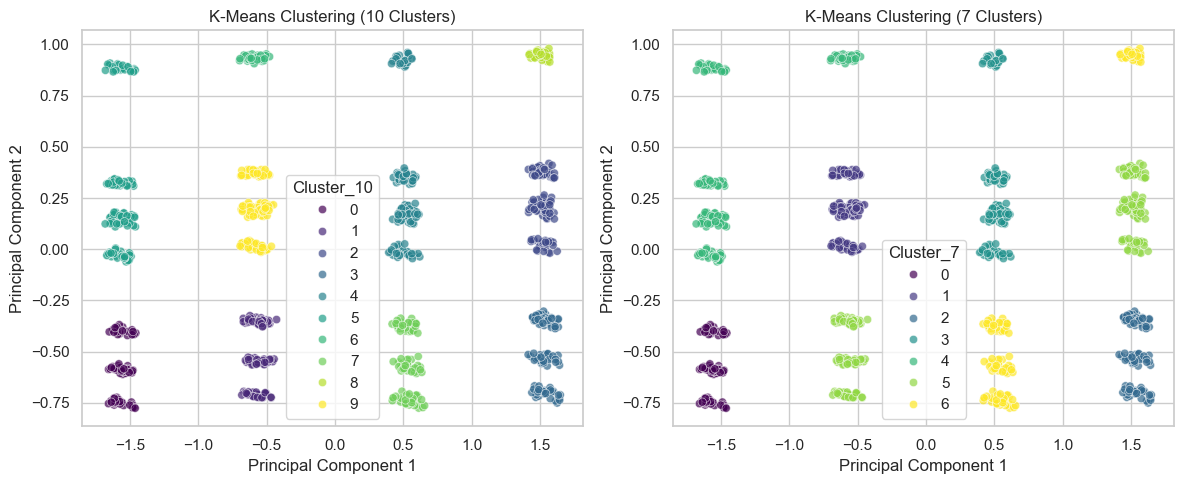

Cluster Centers for 10 Clusters:
[[-1.56234548 -0.59335504  0.        ]
 [-0.56639252 -0.51305584  3.        ]
 [ 1.51775344  0.21394849  2.        ]
 [ 1.5351552  -0.50844417  6.        ]
 [ 0.51157428  0.29869871  1.        ]
 [-1.57061898  0.27954732  4.        ]
 [-0.58401805  0.93422998  5.        ]
 [ 0.53127483 -0.56369962  1.        ]
 [ 1.49867497  0.94844486  2.        ]
 [-0.57965807  0.18978058  3.        ]]

Cluster Centers for 7 Clusters:
[[-1.56234548e+00 -5.93355035e-01  0.00000000e+00 -8.88178420e-16]
 [-5.79658071e-01  1.89780583e-01  3.00000000e+00  9.00000000e+00]
 [ 1.53515520e+00 -5.08444174e-01  6.00000000e+00  3.00000000e+00]
 [ 5.11574279e-01  2.98698713e-01  1.00000000e+00  4.00000000e+00]
 [-1.32264977e+00  4.44093226e-01  4.25133690e+00  5.25133690e+00]
 [ 5.56618170e-01 -1.21320496e-01  2.46116505e+00  1.53883495e+00]
 [ 7.94464574e-01 -1.52307373e-01  1.27205882e+00  7.27205882e+00]]


In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming pca_df is already defined from the previous PCA analysis
# Fit K-Means with the optimal number of clusters from Elbow Method (10 clusters)
kmeans_10 = KMeans(n_clusters=10, random_state=42)
pca_df['Cluster_10'] = kmeans_10.fit_predict(pca_df)

# Fit K-Means with the optimal number of clusters from Silhouette Score (7 clusters)
kmeans_7 = KMeans(n_clusters=7, random_state=42)
pca_df['Cluster_7'] = kmeans_7.fit_predict(pca_df)

# Visualizing the clusters for 10 clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_10', palette='viridis', legend='full', alpha=0.7)
plt.title('K-Means Clustering (10 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualizing the clusters for 7 clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_7', palette='viridis', legend='full', alpha=0.7)
plt.title('K-Means Clustering (7 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Display the cluster centers for both models
centers_10 = kmeans_10.cluster_centers_
centers_7 = kmeans_7.cluster_centers_

print("Cluster Centers for 10 Clusters:")
print(centers_10)

print("\nCluster Centers for 7 Clusters:")
print(centers_7)
